In [2]:
'''Importing all the libraries'''
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [3]:
'''We load the dataset'''
fifa_df = pd.read_csv('fifa21_male2.csv')


C:\software-da\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
'''Now we jump into the data exploration phase'''


'Now we jump into the data exploration phase'

In [5]:
'''First we take a look at the first 5 rows of the dataset and it's shape, we see two main things: (i) the dataset has a lot of columns (107) and (ii) there seems to be both numerical and categorical data.'''
fifa_df.head() 

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [6]:
fifa_df.shape  

(17125, 107)

In [7]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [8]:
'''We check if our data contains any duplicate'''
fifa_df.duplicated().value_counts()

False    17125
dtype: int64

In [9]:
'''And then list all the categorical and numerical columns'''
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
fifa_df.select_dtypes(exclude=numerics).columns 

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Player Photo',
       'Club Logo', 'Flag Photo', 'Team & Contract', 'Height', 'Weight',
       'foot', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender'],
      dtype='object')

In [10]:
fifa_df.select_dtypes(include=numerics).columns

Index(['ID', 'Age', 'OVA', 'BOV', 'POT', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [11]:
'''Then we go to the data cleaning part. We first focus on 'Value' as it's our target variable'''


"Then we go to the data cleaning part. We first focus on 'Value' as it's our target variable"

In [12]:
fifa_df[['Name','Value']]

,Name,Value
0,G. Pasquale,€625K
1,Luis García,€600K
2,J. Cole,€1.1M
3,D. Yorke,€0
4,Iniesta,€5.5M
...,...,...
17120,A. Medioub,€550K
17121,W. Rickard,€130K
17122,C. Barrett,€130K
17123,J. Gazibegović,€475K


In [13]:
'''We remove the € sign and add zeros accordingly'''
fifa_df['Value']= fifa_df['Value'].str.strip('€') # extract €.
fifa_df['Value']=fifa_df['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)# and change the type of column to categorical to numerical

In [14]:
'''We then jump into the data exploration, wee see that most players have a low value and that there are some clear outliers'''

'We then jump into the data exploration, wee see that most players have a low value and that there are some clear outliers'

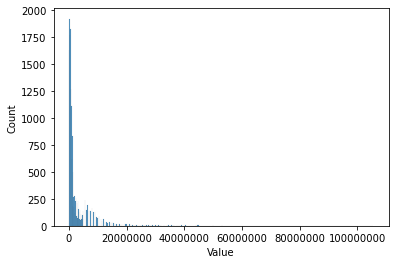

In [15]:
sns.histplot(fifa_df, x='Value')
plt.ticklabel_format(style='plain', axis='x')

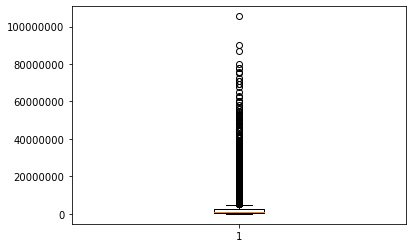

In [16]:
plt.boxplot(fifa_df['Value'])
plt.ticklabel_format(style='plain', axis='y')

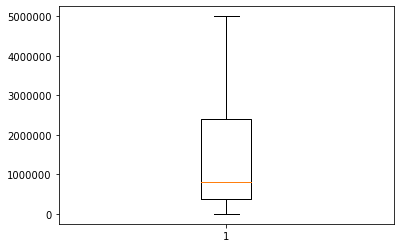

In [17]:
plt.boxplot(fifa_df['Value'], showfliers=False)
plt.ticklabel_format(style='plain', axis='y')

In [18]:
'''We convert categorical column 'BP' to numerical to understand if it has a strong correlation with our target'''
bp_dummies = pd.get_dummies(fifa_df['BP']) # converting categorical column 'BP' to numerical
column_drop=bp_dummies.columns.to_list()

In [19]:
fifa_df=fifa_df.drop(columns=column_drop)
fifa_df_complete=pd.concat([fifa_df, bp_dummies], axis=1)

In [20]:
fifa_df_complete.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,0,0,0,0,1,0,0,0,0,0
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,0,0,0,0,0,0,0,0,0,0
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,0,0,0,0,0,0,0,0,0,0
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,0,0,0,0,0,0,0,0,0,1
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,0,0,0,0,0,0,0,0,0,0


In [21]:
'''We create a numerics DataFrame for a better data exploration'''
fifa_numerics = fifa_df_complete[fifa_df_complete.select_dtypes(include=numerics).columns]
fifa_numerics.head()

,ID,Age,OVA,BOV,POT,Growth,Value,Attacking,Crossing,Finishing,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,2,33,69,71,69,0,625000,313,75,50,...,0,0,0,0,1,0,0,0,0,0
1,16,37,71,70,71,0,600000,337,68,64,...,0,0,0,0,0,0,0,0,0,0
2,27,33,71,71,71,0,1100000,337,80,64,...,0,0,0,0,0,0,0,0,0,0
3,36,36,68,70,82,14,0,264,54,70,...,0,0,0,0,0,0,0,0,0,1
4,41,36,81,82,81,0,5500000,367,75,69,...,0,0,0,0,0,0,0,0,0,0


In [22]:
'''We see that BOV, OVA and POT are the variables that are most correlated with our target'''
fifa_numerics.corr()[['Value']].sort_values(by='Value',ascending=False).head(10)

,Value
Value,1.000000
BOV,0.640818
OVA,0.631679
POT,0.563570
Reactions,0.559096
Base Stats,0.526843
Composure,0.447487
PAS,0.444484
DRI,0.442156
Total Stats,0.393043


In [23]:
'''We create a DataFrame with the attributes that have highest correlation with our target'''
attributes = fifa_numerics.drop(fifa_numerics.columns.difference(['BOV','OVA','POT','Reactions','Base Stats','Composure','PAS','DRI']), 1)

C:\Users\suparna\AppData\Local\Temp/ipykernel_24564/3279600060.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  attributes = fifa_numerics.drop(fifa_numerics.columns.difference(['BOV','OVA','POT','Reactions','Base Stats','Composure','PAS','DRI']), 1)


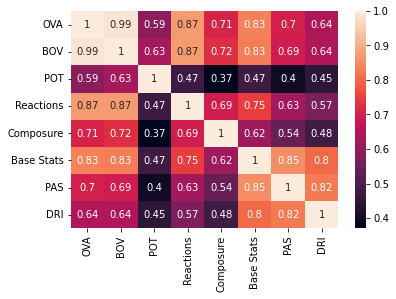

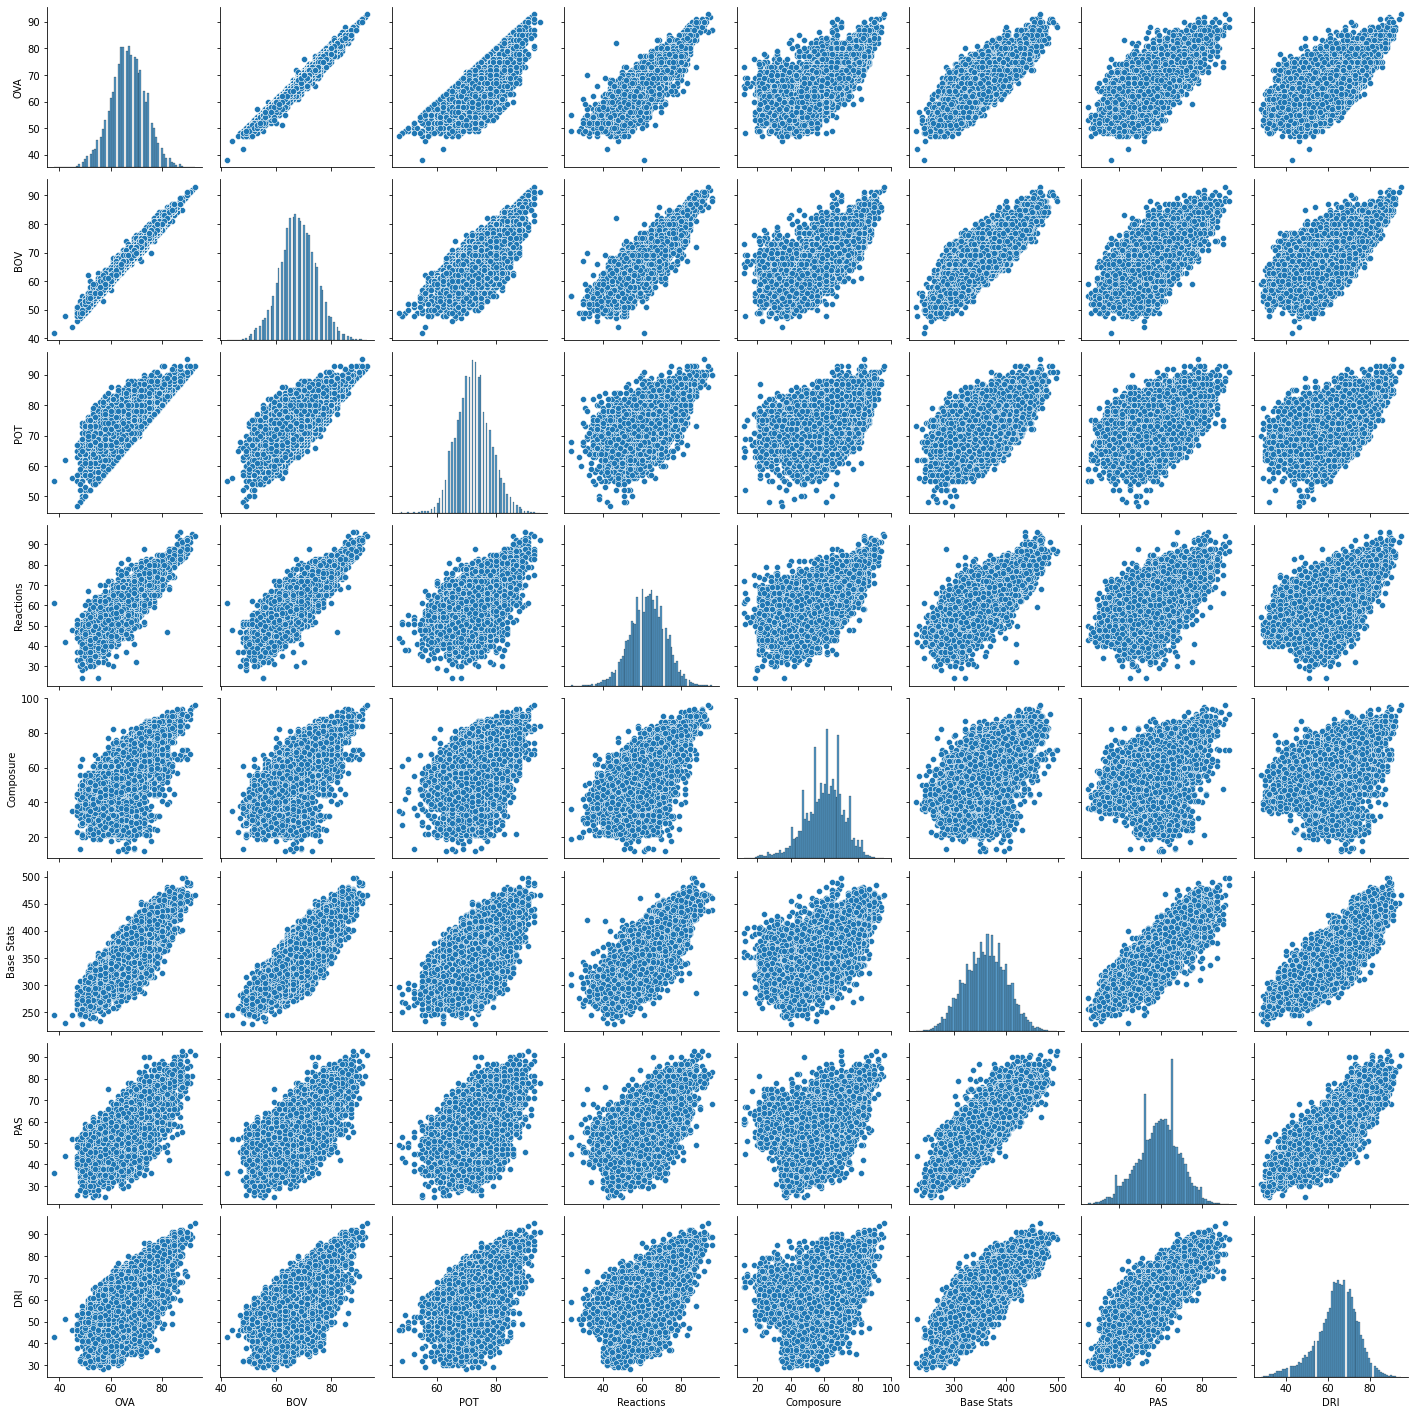

In [24]:
'''We see that the most important variables are: OVA, POT and DRI given that they have a strong correlation with the target but farily low correlation between each other'''

sns.heatmap(attributes.corr(), annot=True)   

sns.pairplot(attributes)
plt.show()

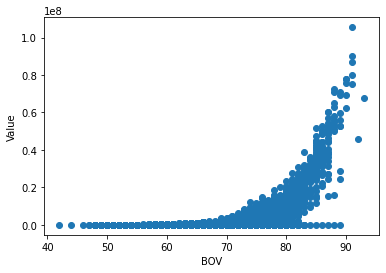

In [25]:
'''We take a closer look at the three variables that we consider the most important'''
X = fifa_numerics[['BOV']]
y = fifa_numerics['Value']

plt.scatter(X,y)
plt.xlabel('BOV')
plt.ylabel('Value')
plt.show()

<AxesSubplot:xlabel='BOV', ylabel='Count'>

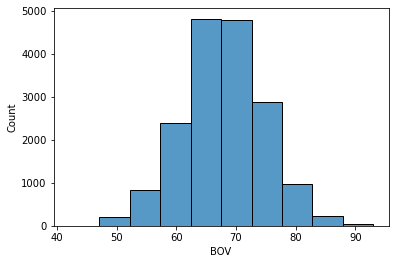

In [26]:
sns.histplot(fifa_numerics.BOV,bins=10)# Its uniformly distributed

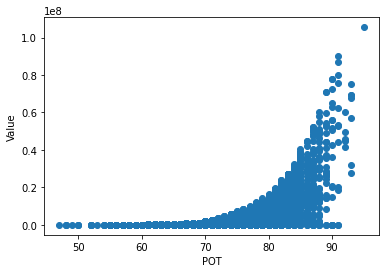

In [27]:
X = fifa_numerics[['POT']]
y = fifa_numerics['Value']

plt.scatter(X,y)
plt.xlabel('POT')
plt.ylabel('Value')
plt.show()  

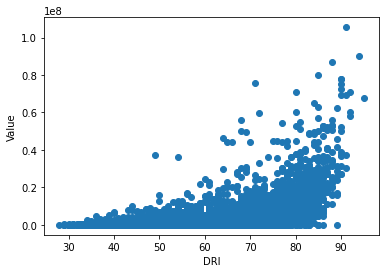

In [28]:

X = fifa_numerics[['DRI']]
y = fifa_numerics['Value']

plt.scatter(X,y)
plt.xlabel('DRI')
plt.ylabel('Value')
plt.show()

In [29]:
'''We decide to build a model with the three variables previously explained. We start with standardizing them'''
standardizer = StandardScaler()
fifa_numerics[['BOV', 'POT','DRI']] = standardizer.fit_transform(fifa_numerics[['BOV', 'POT','DRI']])

C:\software-da\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [30]:
'''We define the target, which is Value, and the input variables'''
X=fifa_numerics[['BOV', 'POT','DRI']]
y=fifa_numerics['Value'] 

In [31]:
'''We create a linear model and see that the initial R2 is 0.45, This it not too high but better than randomess. We then decide to go with a polynomial model to fit better the curve of our data'''
model = linear_model.LinearRegression()
results = model.fit(X,y)
print('R2 is',results.score(X,y))

R2 is 0.454140696676093


C:\software-da\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\software-da\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\software-da\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


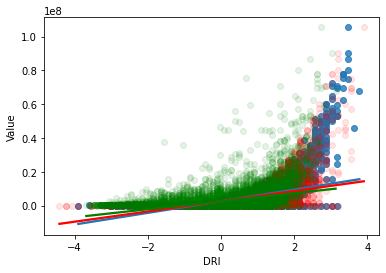

In [32]:
sns.regplot(fifa_numerics['BOV'], fifa_numerics['Value'])
sns.regplot(fifa_numerics['POT'], fifa_numerics['Value'], color='r',scatter_kws={'alpha':0.1})
sns.regplot(fifa_numerics['DRI'], fifa_numerics['Value'], color='g',scatter_kws={'alpha':0.1})
plt.show()


In [33]:
'''The polynomial data leads to an R2 of 0.77'''
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2, include_bias=False)
feat_poly = polynomial.fit_transform(X)

regression = linear_model.LinearRegression()
modelpoly = regression.fit(feat_poly, y)
print(modelpoly.score(feat_poly,y))

0.7715768231189408


In [34]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
predictions=pd.DataFrame(modelpoly.predict(feat_poly))
predictions = predictions.rename(columns={0:'Predicted Value'})
predictions

,Predicted Value
0,1309065.61710
1,1194922.54772
2,1901393.82060
3,4208719.38428
4,16692294.50630
...,...
17120,-453253.63586
17121,290066.76307
17122,841196.47481
17123,-797251.65611


In [36]:
'''We then get the predicted value per player and compute the difference between their predicted value and current market value'''
fifa_numerics_predictions=pd.concat([fifa_numerics, predictions], axis=1)
fifa_numerics_predictions['Value difference'] = fifa_numerics_predictions['Predicted Value']-fifa_numerics_predictions['Value']
fifa_numerics_predictions.sort_values(by='Value difference', ascending=False)

,ID,Age,OVA,BOV,POT,Growth,Value,Attacking,Crossing,Finishing,...,LM,LW,LWB,RB,RM,RW,RWB,ST,Predicted Value,Value difference
1425,177176,32,87,3.17895,3.03481,3,0,323,70,90,...,0,0,0,0,0,0,0,1,34950495.66341,34950495.66341
1427,177193,23,87,3.02829,3.03481,3,0,295,87,74,...,0,0,0,0,0,0,0,0,33587239.84587,33587239.84587
14,488,38,87,2.87763,3.03481,3,0,84,21,21,...,0,0,0,0,0,0,0,0,31136466.71557,31136466.71557
1426,177182,33,86,2.57630,3.20813,5,0,313,61,93,...,0,0,0,0,0,0,0,1,28092484.62592,28092484.62592
62,5003,37,83,2.72696,2.68818,5,0,270,85,22,...,0,0,0,0,0,0,0,0,27470657.35261,27470657.35261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,208722,28,90,3.32961,3.03481,0,78000000,410,76,90,...,0,1,0,0,0,0,0,0,37420264.28234,-40579735.71766
5109,209331,28,90,3.32961,3.03481,0,78000000,392,79,91,...,0,0,0,0,0,1,0,0,37420264.28234,-40579735.71766
2871,192985,29,91,3.48028,3.20813,0,87000000,407,94,82,...,0,0,0,0,0,0,0,0,40122942.98792,-46877057.01208
2650,190871,28,91,3.48028,3.20813,0,90000000,408,85,87,...,0,1,0,0,0,0,0,0,40881957.73251,-49118042.26749


In [41]:
'''We want to select players that (i) have a higher predicted value than market value and (ii) are young so that they have enough time to shine so that we can sell them.'''

players_selection=fifa_numerics_predictions[fifa_numerics_predictions['Age']<fifa_numerics_predictions['Age'].mean()].sort_values(by='Value difference', ascending=False).head(4)
players_selection

,ID,Age,OVA,BOV,POT,Growth,Value,Attacking,Crossing,Finishing,...,LM,LW,LWB,RB,RM,RW,RWB,ST,Predicted Value,Value difference
1427,177193,23,87,3.02829,3.03481,3,0,295,87,74,...,0,0,0,0,0,0,0,0,33587239.84587,33587239.84587
1948,184330,21,38,-3.90219,-3.03128,17,0,141,31,37,...,0,0,0,0,0,0,0,0,19433111.60754,19433111.60754
9654,233107,18,45,-3.60087,-2.85796,11,45000,73,12,13,...,0,0,0,0,0,0,0,0,15865404.16011,15820404.16011
8950,230347,20,81,1.97365,1.47496,0,0,327,82,51,...,0,0,0,0,0,0,0,0,14873514.74756,14873514.74756


In [38]:
players_selection.to_csv('players_to_buy.csv')